# Eigenmodes

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

def filter_sort_eig(eigvals, eigfuns):
    # Filter the slow-decaying modes (these are usually the non-spurious ones)
    idx_filtered = np.abs(np.imag(eigvals)) > 0.5*np.abs(np.real(eigvals))
    eigvals = eigvals[idx_filtered]
    eigfuns = eigfuns[:, idx_filtered]
    # Sort by real part, and then by imaginary part
    idx_sorted = sorted(list(range(eigvals.size)), key=lambda i: (-np.real(eigvals[i]), np.abs(np.imag(eigvals[i]))))
    eigvals = eigvals[idx_sorted]
    eigfuns = eigfuns[:, idx_sorted]
    return eigvals, eigfuns

## Plot eigenmodes - FEM

In [135]:
with h5py.File("./output/eigenmodes_n50_v2.h5", 'r') as f:
    xcoord = f["nodes"][()]
    eigvals = f["eigenvals"][()]
    eigfuns = f["eigenfuns"][()]

In [124]:
idx_filtered = np.abs(np.imag(eigvals)/np.real(eigvals)) > .5
eigvals = eigvals[idx_filtered]
eigfuns = eigfuns[:, idx_filtered]

In [125]:
idx_argsort = np.argsort(np.abs(np.imag(eigvals)))
eigvals = eigvals[idx_argsort]
eigfuns = eigfuns[:, idx_argsort]

In [136]:
eigvals

array([-7.48740345e+01 +0.j        , -7.44693484e+01 +0.j        ,
       -7.37896390e+01 +0.j        , -7.28422843e+01 +0.j        ,
       -7.16389189e+01 +0.j        , -7.01941441e+01 +0.j        ,
       -6.85247956e+01 +0.j        , -6.66492541e+01 +0.j        ,
       -6.45867527e+01 +0.j        , -6.23566895e+01 +0.j        ,
       -5.99779510e+01 +0.j        , -5.74682507e+01 +0.j        ,
       -5.48434690e+01 +0.j        , -5.21169618e+01 +0.j        ,
       -4.92987694e+01 +0.j        , -4.63946002e+01 +0.j        ,
       -4.34043455e+01 +0.j        , -4.03196242e+01 +0.j        ,
       -3.71192237e+01 +0.j        , -3.37594715e+01 +0.j        ,
       -3.01501200e+01 +0.j        , -2.60746910e+01 +0.j        ,
       -2.06948714e+01 +0.j        , -1.64369366e+01-11.69719646j,
       -1.64369366e+01+11.69719646j, -1.64284935e+01+10.02887103j,
       -1.64284935e+01-10.02887103j, -1.63744657e+01+13.25616349j,
       -1.63744657e+01-13.25616349j, -1.63136369e+01 -8.194934

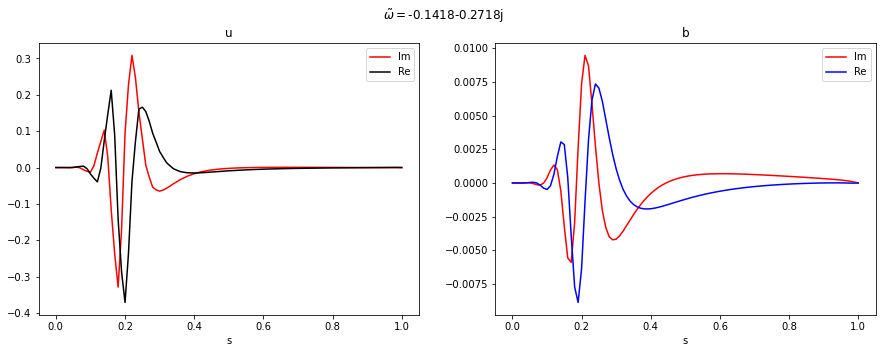

In [134]:
idx = 15

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

ax = axes[0]
ax.plot(xcoord, np.imag(eigfuns[0::2, idx]), 'r-', label="Im")
ax.plot(xcoord, np.real(eigfuns[0::2, idx]), 'k-', label="Re")
ax.legend()
ax.set_xlabel("s")
ax.set_title("u")

ax = axes[1]
ax.plot(xcoord, np.imag(eigfuns[1::2, idx]), 'r-', label="Im")
ax.plot(xcoord, np.real(eigfuns[1::2, idx]), 'b-', label="Re")
ax.legend()
ax.set_xlabel("s")
ax.set_title("b")

fig.suptitle(r"$\tilde{\omega}=$" + "{:.4f}".format(eigvals[idx]))

plt.show()

## Plot eigenmodes - Spectral

In [3]:
import scipy.special as specfun
from spectral import basis

with h5py.File("./output/eigenmodes_Pm0_cheby50.h5", 'r') as f:
    degrees = f["degrees"][()]
    eigvals = f["eigenvals"][()]
    eigfuns = f["eigenfuns"][()]

In [4]:
eigvals, eigfuns = filter_sort_eig(eigvals, eigfuns)

In [5]:
eigvals

array([-0.01679284 +0.68673024j, -0.01679284 -0.68673024j,
       -0.07752279 -0.83286503j, -0.07752279 +0.83286503j,
       -0.14996108 -1.03676239j, -0.14996108 +1.03676239j,
       -0.22894237 -1.27399302j, -0.22894237 +1.27399302j,
       -0.31252743 -1.53161768j, -0.31252743 +1.53161768j,
       -0.40069261 -1.80224367j, -0.40069261 +1.80224367j,
       -0.4947876  -2.0816243j , -0.4947876  +2.0816243j ,
       -0.60052979 +2.36919843j, -0.60052979 -2.36919843j,
       -0.72428099 +2.7167497j , -0.72428099 -2.7167497j ,
       -0.74920069 -3.05515996j, -0.74920069 +3.05515996j,
       -0.78423279 +3.37297085j, -0.78423279 -3.37297085j,
       -0.81902865 -3.69956765j, -0.81902865 +3.69956765j,
       -0.84815603 -2.60623356j, -0.84815603 +2.60623356j,
       -0.85697003 -4.04043518j, -0.85697003 +4.04043518j,
       -0.89526077 +4.39478742j, -0.89526077 -4.39478742j,
       -0.93725501 -4.76680225j, -0.93725501 +4.76680225j,
       -0.98225748 +5.15229593j, -0.98225748 -5.15229593

In [10]:
xi = np.linspace(-1, 1, num=100)
cheby_eval = basis.ChebyshevTSpace(np.arange(50), xi)

In [14]:
eigenmodes_u = np.array([cheby_eval(eigfuns[:50, i]) for i in range(74)])
eigenmodes_b = np.array([cheby_eval(eigfuns[50:, i]) for i in range(74)])

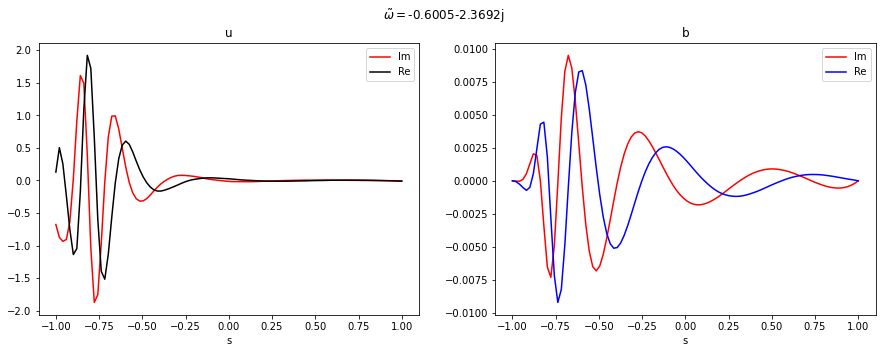

In [17]:
idx = 15

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

ax = axes[0]
ax.plot(xi, np.imag(eigenmodes_u[idx]), 'r-', label="Im")
ax.plot(xi, np.real(eigenmodes_u[idx]), 'k-', label="Re")
ax.legend()
ax.set_xlabel("s")
ax.set_title("u")

ax = axes[1]
ax.plot(xi, np.imag(eigenmodes_b[idx]), 'r-', label="Im")
ax.plot(xi, np.real(eigenmodes_b[idx]), 'b-', label="Re")
ax.legend()
ax.set_xlabel("s")
ax.set_title("b")

fig.suptitle(r"$\tilde{\omega}=$" + "{:.4f}".format(eigvals[idx]))

plt.show()

### Spectral plot

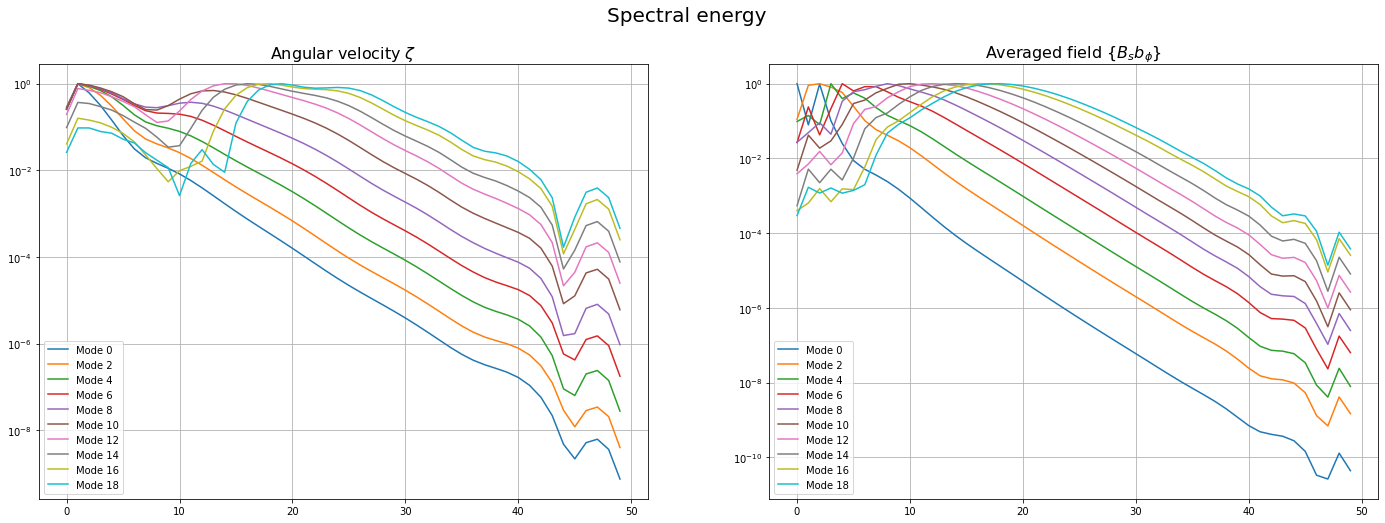

In [36]:
u_coeffs = eigfuns[:50, :]
b_coeffs = eigfuns[50:, :]

# Convert to modulus squared
u_coeffs = np.abs(u_coeffs)**2
b_coeffs = np.abs(b_coeffs)**2

# Normalize by leading Tn coefficient
# u_coeffs = u_coeffs/np.abs(u_coeffs[0, :])
# b_coeffs = b_coeffs/np.abs(b_coeffs[0, :])

# Normalize by maximum coefficient
u_coeffs = u_coeffs/np.max(np.abs(u_coeffs), axis=0)
b_coeffs = b_coeffs/np.max(np.abs(b_coeffs), axis=0)

n_modes = 10

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(24, 8))

ax = axes[0]
lines = ax.semilogy(np.abs(u_coeffs[:, :2*n_modes:2]))
ax.legend(lines, ("Mode {}".format(2*i) for i in range(2*n_modes)))
ax.grid(which="both")
ax.set_title(r"Angular velocity $\zeta$", fontsize=16)

ax = axes[1]
lines = ax.semilogy(np.abs(b_coeffs[:, :2*n_modes:2]))
ax.legend(lines, ("Mode {}".format(2*i) for i in range(2*n_modes)))
ax.grid(which="both")
ax.set_title(r"Averaged field $\{B_s b_\phi\}$", fontsize=16)

fig.suptitle("Spectral energy", fontsize=20)
plt.show()

## Compare eigenmodes

In [2]:
with h5py.File("./output/eigenmodes_Pm0.h5", 'r') as f:
    eigen_0 = f["eigenvals"][()]
    eigfuns_0 = f["eigenfuns"][()]
with h5py.File("./output/eigenmodes_Pm0_sp.h5", 'r') as f:
    eigen_1 = f["eigenvals"][()]
    eigfuns_1 = f["eigenfuns"][()]
with h5py.File("./output/eigenmodes_Pm0_cheby50.h5", 'r') as f:
    eigen_2 = f["eigenvals"][()]
    eigfuns_2 = f["eigenfuns"][()]

eigen_0, eigfuns_0 = filter_sort_eig(eigen_0, eigfuns_0)
eigen_1, eigfuns_1 = filter_sort_eig(eigen_1, eigfuns_1)
eigen_2, eigfuns_2 = filter_sort_eig(eigen_2, eigfuns_2)

for i in range(50):
    print("{:.10e} {:.10e} {:.10e}".format(eigen_0[i], eigen_1[i], eigen_2[i]))

-1.6814902119e-02-6.8674455466e-01j -1.6814902119e-02-6.8674455466e-01j -1.6792836196e-02+6.8673023796e-01j
-1.6814902119e-02+6.8674455466e-01j -1.6814902119e-02+6.8674455466e-01j -1.6792836196e-02-6.8673023796e-01j
-7.7707938551e-02-8.3301073476e-01j -7.7707938551e-02-8.3301073476e-01j -7.7522793792e-02-8.3286503248e-01j
-7.7707938551e-02+8.3301073476e-01j -7.7707938551e-02+8.3301073476e-01j -7.7522793792e-02+8.3286503248e-01j
-1.5049224010e-01-1.0372156529e+00j -1.5049224010e-01-1.0372156529e+00j -1.4996108187e-01-1.0367623900e+00j
-1.5049224010e-01+1.0372156529e+00j -1.5049224010e-01+1.0372156529e+00j -1.4996108187e-01+1.0367623900e+00j
-2.2998790464e-01-1.2749351003e+00j -2.2998790464e-01-1.2749351003e+00j -2.2894237451e-01-1.2739930170e+00j
-2.2998790464e-01+1.2749351003e+00j -2.2998790464e-01+1.2749351003e+00j -2.2894237451e-01+1.2739930170e+00j
-3.1424033850e-01-1.5331757163e+00j -3.1424033850e-01-1.5331757163e+00j -3.1252743003e-01-1.5316176791e+00j
-3.1424033850e-01+1.53317571